# Bank Loan 
reference :
https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet

## Get Jupyter Ready

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import string
import itertools
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# setiing up plot style
plt.style.use('ggplot')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## Importing data

In [5]:
applicationDF=pd.read_csv('data/application_data.csv')
previousDF=pd.read_csv('data/previous_application.csv')
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
applicationDF.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


# Data Inspection & Data cleaning

## Application Data

In [8]:
applicationDF.shape

(307511, 122)

In [9]:
applicationDF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
applicationDF.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> It shows that the dataset has many missing values. The following is checking % of missing values.
</div>

In [11]:
temp=round(applicationDF.isnull().sum()/applicationDF.shape[0]*100,2)
temp

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> Some columns have many missing values by taking more than 30 %   In real data, we encounter quite a lot of missing information. we need to check whether those data need for analyzing process or not. 
</div>

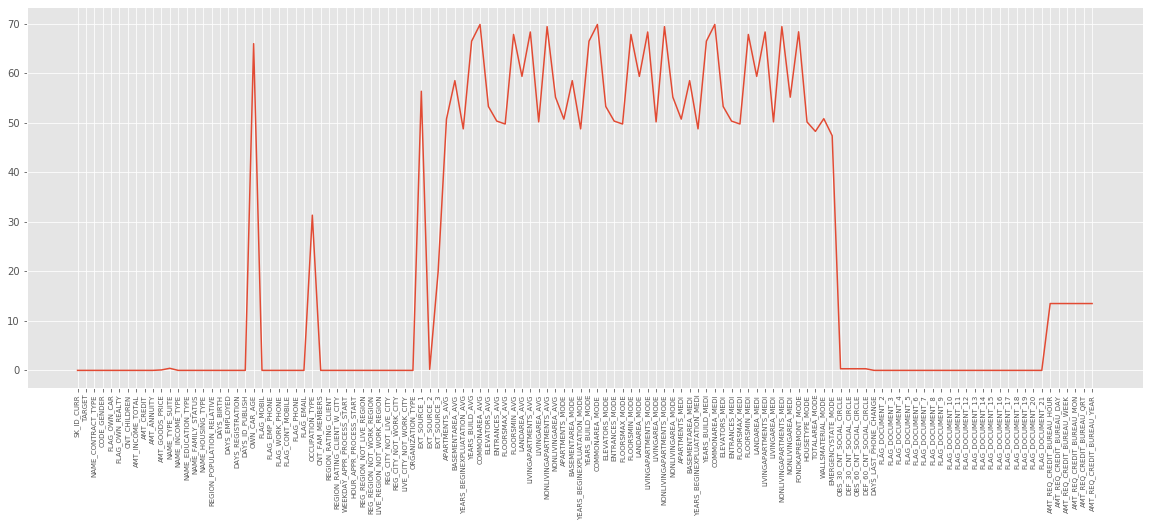

In [12]:
plt.figure(figsize=(20,7))
plt.plot(temp)
plt.xticks(rotation =90,fontsize =7)
plt.show()

In [13]:
null_apDF=temp[temp.values>40]
null_apDF

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [14]:
len(null_apDF)

49

In [15]:
applicationDF=applicationDF[temp[temp.values<40].index]
applicationDF.shape

(307511, 73)

## Previous Data

In [16]:
previousDF.shape

(1670214, 37)

In [17]:
previousDF.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [18]:
previousDF.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> In dataset, some columns have missing values. By checking percentage of null value and importance of data, we can judge whether we delet the column or not for the analysis process
</div>

In [19]:
temp1=round(previousDF.isnull().sum()/previousDF.shape[0]*100,2)
temp1

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

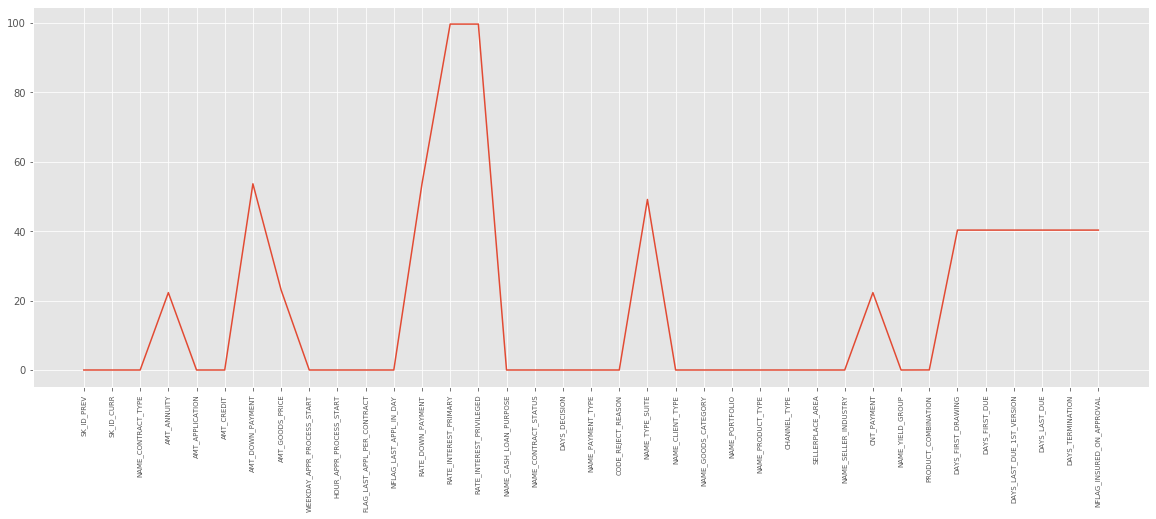

In [20]:
plt.figure(figsize=(20,7))
plt.plot(temp1)
plt.xticks(rotation =90,fontsize =7)
plt.show()

In [21]:
null_preDF=temp1[temp1.values>40]
null_preDF

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [22]:
len(null_preDF)

11

In [23]:
previousDF=previousDF[temp1[temp1.values<40].index]
previousDF.shape

(1670214, 26)

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> We have check which column takes large percetage of missing values. some have 90% of missing values.
</div>

# Exploration of Data
> **OVERALL GOAL:** 
> - Get an understanding for which variables are important, view summary statistics, and visualize the data

## Application data

### Personal information (Gender, Age, Family,Education)

In [24]:
applicationDF['target_label'] = np.where(applicationDF['TARGET'] == 0, 'Repay', 'Default')
applicationDF

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target_label
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Default
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repay
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repay
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Repay
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Repay
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-

In [25]:
gen=applicationDF[['target_label','CODE_GENDER']]
gen[(gen['CODE_GENDER']!='M')&(gen['CODE_GENDER']!='F')]

,target_label,CODE_GENDER
35657,Repay,XNA
38566,Repay,XNA
83382,Repay,XNA
189640,Repay,XNA


In [26]:
x,y = 'target_label', 'CODE_GENDER'

gen1 = gen.groupby(x)[y].value_counts(normalize=True)
gen1 = gen1.mul(100)
gen1 = gen1.rename('percent').reset_index()
gen1

,target_label,CODE_GENDER,percent
0,Default,F,57.079557
1,Default,M,42.920443
2,Repay,F,66.603228
3,Repay,M,33.395357
4,Repay,XNA,0.001415


posx and posy should be finite values
posx and posy should be finite values


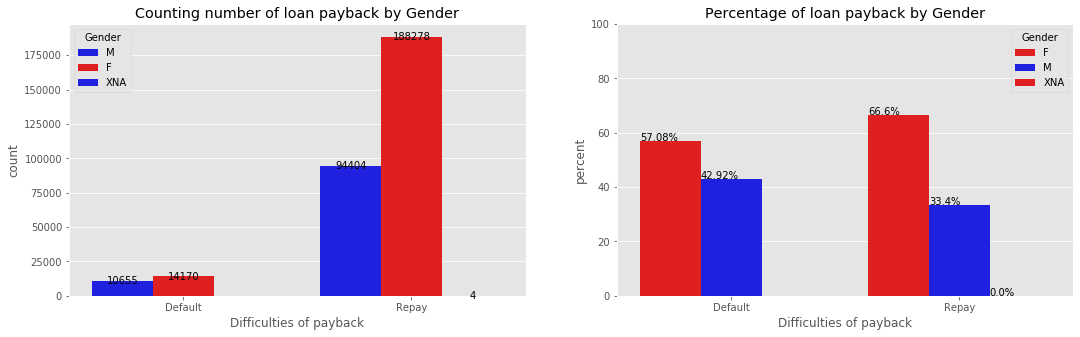

In [27]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5) 
sns.countplot(data=gen,x='target_label',hue='CODE_GENDER',ax=ax1,palette=['b','r'])
ax1.set(xlabel='Difficulties of payback')
ax1.legend(title='Gender',loc=2)
ax1.set_title('Counting number of loan payback by Gender')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center')

sns.barplot(x='target_label',y='percent',hue='CODE_GENDER',data=gen1,ax=ax2,palette=['r','b'])
ax2.set_ylim(0,100)
ax2.set(xlabel='Difficulties of payback')
ax2.legend(title='Gender',loc=1)
ax2.set_title('Percentage of loan payback by Gender')
for p in ax2.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax2.text(txt_x,txt_y,txt)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> As we can seen above, the number of women who payback their loan are double compared to men
</div>

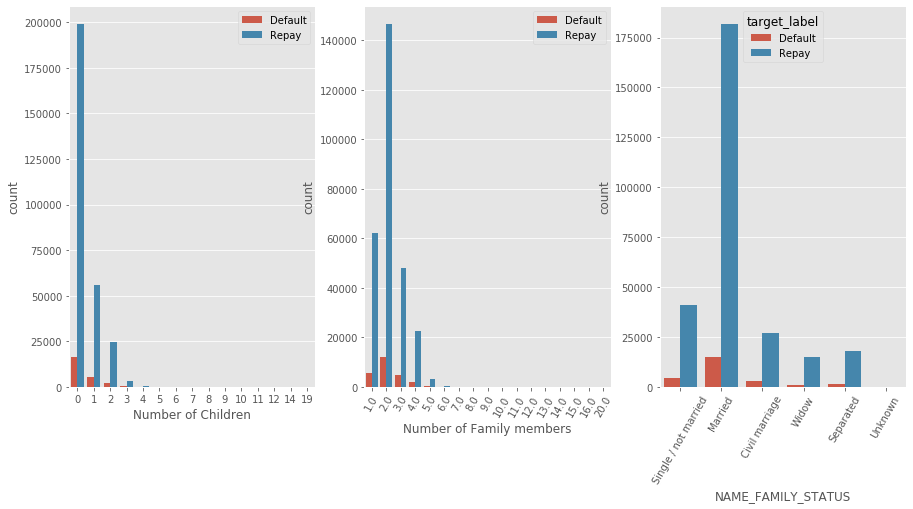

In [28]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(data=applicationDF,x='CNT_CHILDREN',hue='target_label')
plt.legend(loc=1)
plt.xlabel("Number of Children")
plt.subplot(1,3,2)
sns.countplot(data=applicationDF,x='CNT_FAM_MEMBERS',hue='target_label')
plt.legend(loc=1)
plt.xlabel("Number of Family members")
plt.xticks(rotation=60)
plt.subplot(1,3,3)
sns.countplot(data=applicationDF,x='NAME_FAMILY_STATUS',hue='target_label')
plt.xticks(rotation=60)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> Most of clients are married (2 family members) or live alone. Among those who live with families, they don't have child.
</div>

<div class="alert alert-block alert-warning">
    <b>Findings: </b> Days of birth have negative values,It does not make sense having negative birth days. So I take absolute to convert it positive.</div>

In [29]:
applicationDF['DAYS_BIRTH']=abs(applicationDF['DAYS_BIRTH'])
applicationDF['age']=applicationDF['DAYS_BIRTH']//365
bins=[0,20,30,40,50,60,100]
labels=['0-20','20-30','30-40','40-50','50-60','60 Above']
applicationDF['age_group']=pd.cut(applicationDF['age'],bins=bins,labels=labels)
applicationDF['age_group'].value_counts()

30-40       83117
40-50       74401
50-60       67819
20-30       52805
60 Above    29368
0-20            1
Name: age_group, dtype: int64

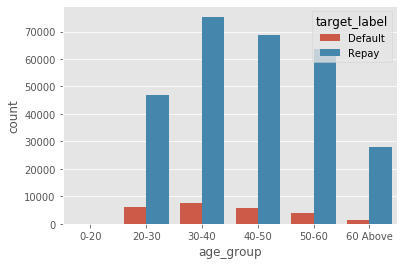

In [30]:
sns.countplot(data=applicationDF,x='age_group',hue='target_label')

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> Most of borrowersare 30s and 40s and the least age group is 60 above
</div>

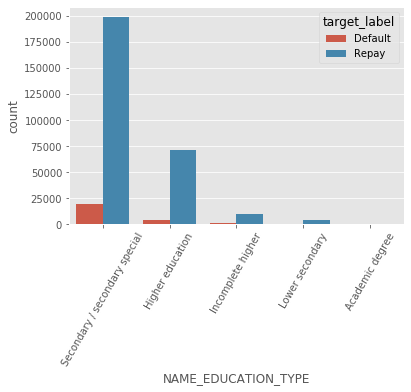

In [31]:
sns.countplot(data=applicationDF,x='NAME_EDUCATION_TYPE',hue='target_label')
plt.xticks(rotation=60)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> Majority of clients are secondary/ secondary special education followed by higher eduction. The least number is academic degree clients.
</div>

### Loan 

In [32]:
x,y = 'target_label', 'NAME_CONTRACT_TYPE'

contype= applicationDF.groupby(x)[y].value_counts(normalize=True)
contype = contype.mul(100)
contype = contype.rename('percent').reset_index()
contype

,target_label,NAME_CONTRACT_TYPE,percent
0,Default,Cash loans,93.538771
1,Default,Revolving loans,6.461229
2,Repay,Cash loans,90.209986
3,Repay,Revolving loans,9.790014


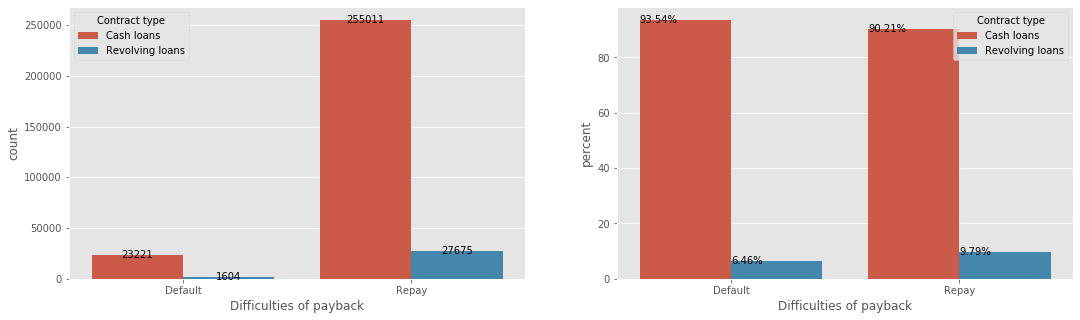

In [33]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5) 
sns.countplot(data=applicationDF,hue='NAME_CONTRACT_TYPE',x='target_label',ax=ax1)
ax1.set(xlabel='Difficulties of payback')
ax1.legend(title='Contract type')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='center')
sns.barplot(data=contype,hue='NAME_CONTRACT_TYPE',x='target_label',y='percent',ax=ax2)
ax2.set(xlabel='Difficulties of payback')
ax2.legend(title='Contract type')
for p in ax2.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax2.text(txt_x,txt_y,txt,ha='left',va='center')

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> The most purpose of loan is cash loans. It takes more than 90% of total borrowings.
</div>

### Asset (cars, properties)

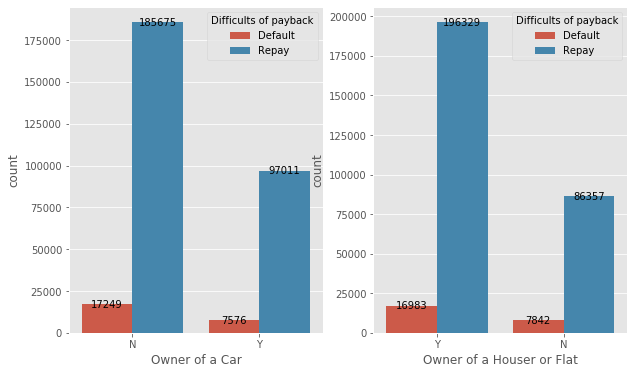

In [34]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.countplot(ax=axes[0],data=applicationDF,x='FLAG_OWN_CAR',hue='target_label')
axes[0].set(xlabel='Owner of a Car')
axes[0].legend(title='Difficults of payback')
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center')
    
sns.countplot(ax=axes[1],data=applicationDF,x='FLAG_OWN_REALTY',hue='target_label')
axes[1].set(xlabel='Owner of a Houser or Flat')
axes[1].legend(title='Difficults of payback')
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center')

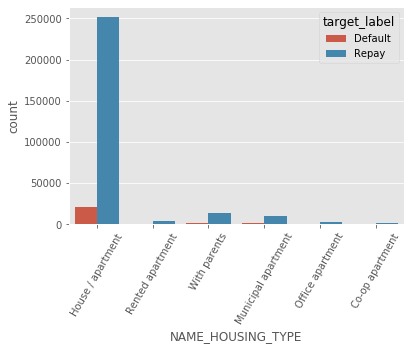

In [35]:
sns.countplot(data=applicationDF,x='NAME_HOUSING_TYPE',hue='target_label')
plt.xticks(rotation=60)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> Most of clients live in House/Apartment and owner of the house. But majority does not have a car.
</div>

### Income and Job 

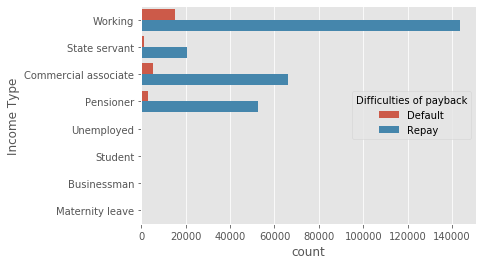

In [36]:
sns.countplot(data=applicationDF,y='NAME_INCOME_TYPE',hue='target_label')
plt.ylabel("Income Type")
plt.legend(title='Difficulties of payback')

reference: 
https://re-thought.com/creating-wordclouds-in-python/ 

https://www.pluralsight.com/guides/natural-language-processing-visualizing-text-data-using-word-cloud 

https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

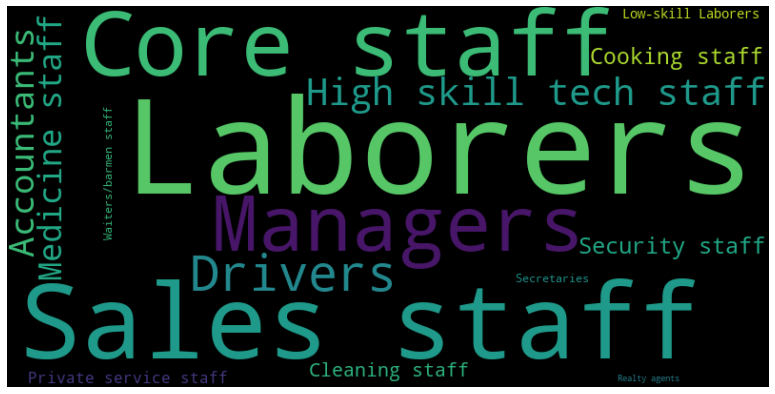

In [37]:
df_emp_cloud=applicationDF.OCCUPATION_TYPE.value_counts()
df_emp_cloud=df_emp_cloud.to_frame().reset_index()
df_emp_cloud
d={}
for a, x in df_emp_cloud.values:
    d[a]=x
wordcloud=WordCloud(background_color='black',min_font_size=9, width=800,height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

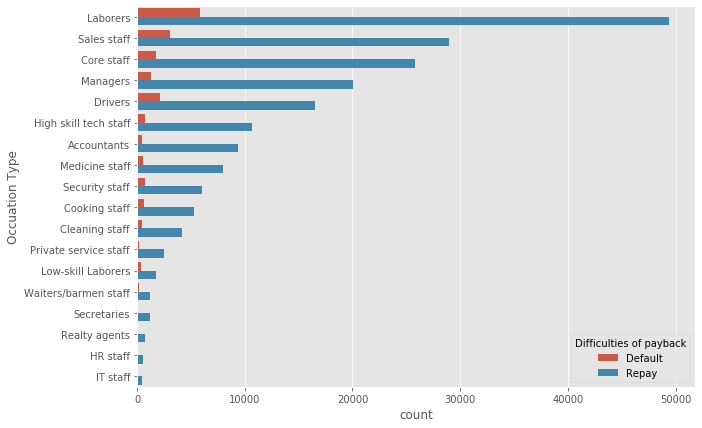

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(data=applicationDF,y='OCCUPATION_TYPE',hue='target_label',order = applicationDF['OCCUPATION_TYPE'].value_counts().index)
plt.ylabel("Occuation Type")
plt.legend(title='Difficulties of payback')

https://pbpython.com/pandas-qcut-cut.html


In [39]:
applicationDF['income_label']=applicationDF['AMT_INCOME_TOTAL']/1000
bins=[0,100,200,300,400,500,600,700,800,900,1000,1500]
rang = ['0k-100K','100K-200K','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['income_range']=pd.cut(applicationDF['income_label'],bins=bins,labels=rang)

In [40]:
applicationDF['income_range'].value_counts()

100K-200K    155898
200k-300k     65176
0k-100K       63698
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
800k-900k       298
1M Above        166
700k-800k       162
900k-1M          28
Name: income_range, dtype: int64

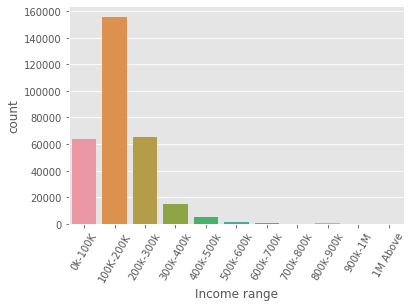

In [41]:
sns.countplot(data=applicationDF,x='income_range')
plt.xticks(rotation=60)
plt.xlabel('Income range')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Findings: </b> Days of employed have negative values but as we know, employment days cannot have negative values. Therefore, it needs to convert positive values.</div>

In [42]:
applicationDF.groupby('OCCUPATION_TYPE')['income_label'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
OCCUPATION_TYPE,,,,,,,,
Managers,21371.0,260.336682,184.940985,27.00,157.5000,225.00,315.0,9000.000
IT staff,526.0,213.465602,142.009792,45.00,135.0000,180.00,247.5,2025.000
Realty agents,751.0,195.003995,82.992756,67.50,135.0000,180.00,225.0,675.000
Accountants,9813.0,194.578358,108.876813,27.00,130.5000,178.65,225.0,2214.117
HR staff,563.0,188.916282,93.155321,30.60,135.0000,158.40,225.0,699.750
Drivers,18603.0,187.011606,82.593383,27.00,135.0000,180.00,225.0,2475.000
High skill tech staff,11380.0,182.842046,95.711001,27.00,112.5000,157.50,225.0,1890.000
Private service staff,2652.0,182.334813,104.751224,36.00,121.5000,157.50,225.0,3150.000
Core staff,27570.0,172.656695,98.147106,27.00,112.5000,157.50,202.5,3600.000


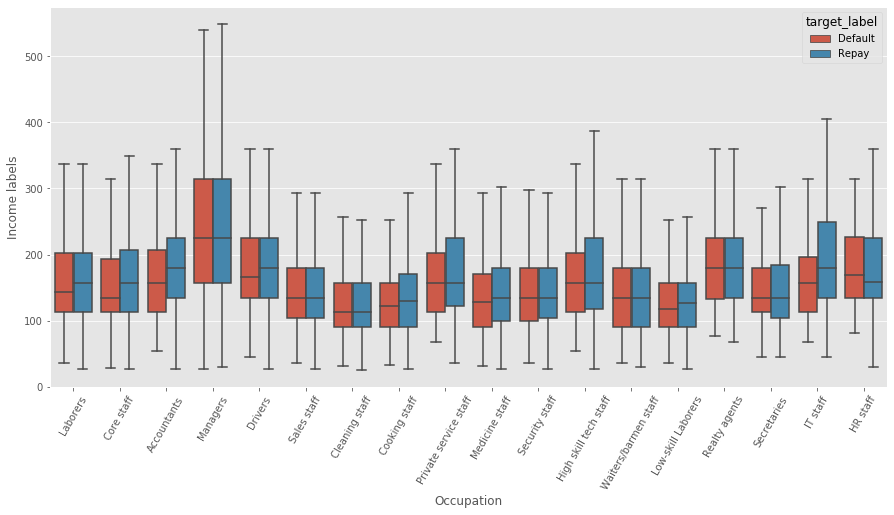

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(x='OCCUPATION_TYPE',y='income_label',hue='target_label',data=applicationDF, showfliers = False)
plt.xticks(rotation=60)
plt.xlabel('Occupation')
plt.ylabel('Income labels')
plt.show()

In [44]:
applicationDF['DAYS_EMPLOYED']=abs(applicationDF['DAYS_EMPLOYED'])
# change to years of employment
applicationDF['years_emp']=applicationDF['DAYS_EMPLOYED']//365 
bins=[-1,5,10,15,20,25,30,35,40,50,60,100]
labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-50','50-60','60 Above']
applicationDF['employment_year']=pd.cut(applicationDF['years_emp'],bins=bins,labels=labels)

In [45]:
applicationDF['employment_year'].value_counts()

0-5         152538
5-10         55983
10-15        22928
15-20         9730
20-25         5465
25-30         2944
30-35         1740
35-40          634
40-50          175
60 Above         0
50-60            0
Name: employment_year, dtype: int64

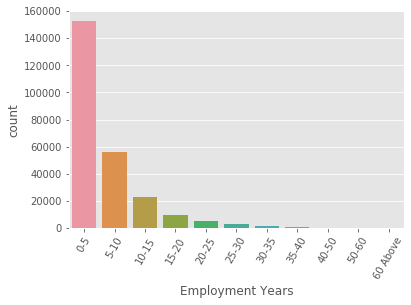

In [46]:
sns.countplot(data=applicationDF,x='employment_year')
plt.xticks(rotation=60)
plt.xlabel('Employment Years')
plt.show()

### Credit

In [47]:
emp_credit=applicationDF[['TARGET','target_label','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','OCCUPATION_TYPE']]

In [48]:
emp_credit.groupby(by='target_label')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
target_label,,,,,,,,
Default,24825.0,165611.760906,746676.959440,25650.0,112500.0,135000.0,202500.0,117000000.0
Repay,282686.0,169077.722266,110476.268524,25650.0,112500.0,148500.0,202500.0,18000090.0


In [49]:
corrmat=emp_credit.corr()
corrmat

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
TARGET,1.000000,-0.003982,-0.030369,-0.012817,-0.039645
AMT_INCOME_TOTAL,-0.003982,1.000000,0.156870,0.191657,0.159610
AMT_CREDIT,-0.030369,0.156870,1.000000,0.770138,0.986968
AMT_ANNUITY,-0.012817,0.191657,0.770138,1.000000,0.775109
AMT_GOODS_PRICE,-0.039645,0.159610,0.986968,0.775109,1.000000


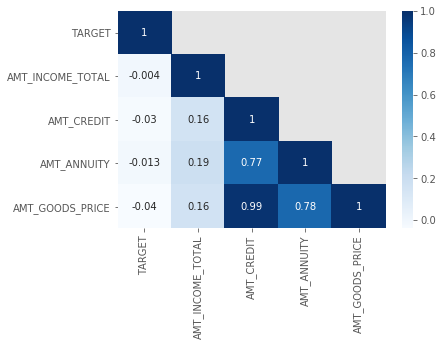

In [50]:
mask=np.array(corrmat)
mask[np.tril_indices_from(mask)]=False # To show only half of the correlation heatmap
sns.heatmap(data=corrmat,cmap='Blues',annot=True,mask=mask)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> It shows amount of income has no relationship with loan payment and credit amounts. Of course, the amount of credit and good price highly related to annity of loan. 
</div>

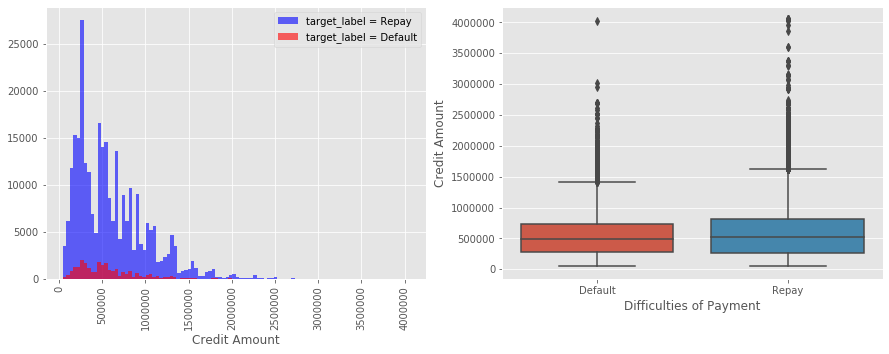

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
emp_credit[emp_credit["target_label"] == "Repay"]["AMT_CREDIT"].hist(bins=100, color='blue', label='target_label = Repay', alpha=0.6)
emp_credit[emp_credit["target_label"] == "Default"]["AMT_CREDIT"].hist(bins=100, color='red', label='target_label = Default', alpha=0.6)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Credit Amount")


plt.subplot(1,2,2)
sns.boxplot(x='target_label',y='AMT_CREDIT',data=emp_credit)
plt.xlabel("Difficulties of Payment")
plt.ylabel("Credit Amount")

plt.show()

### Flag information and documents

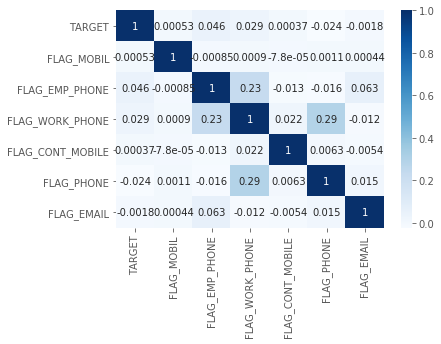

In [52]:
flag=applicationDF[['TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']]
sns.heatmap(flag.corr(),annot=True,cmap='Blues')

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> There is no relationship between flag of mobile,phone, email and loan payment. 
</div>

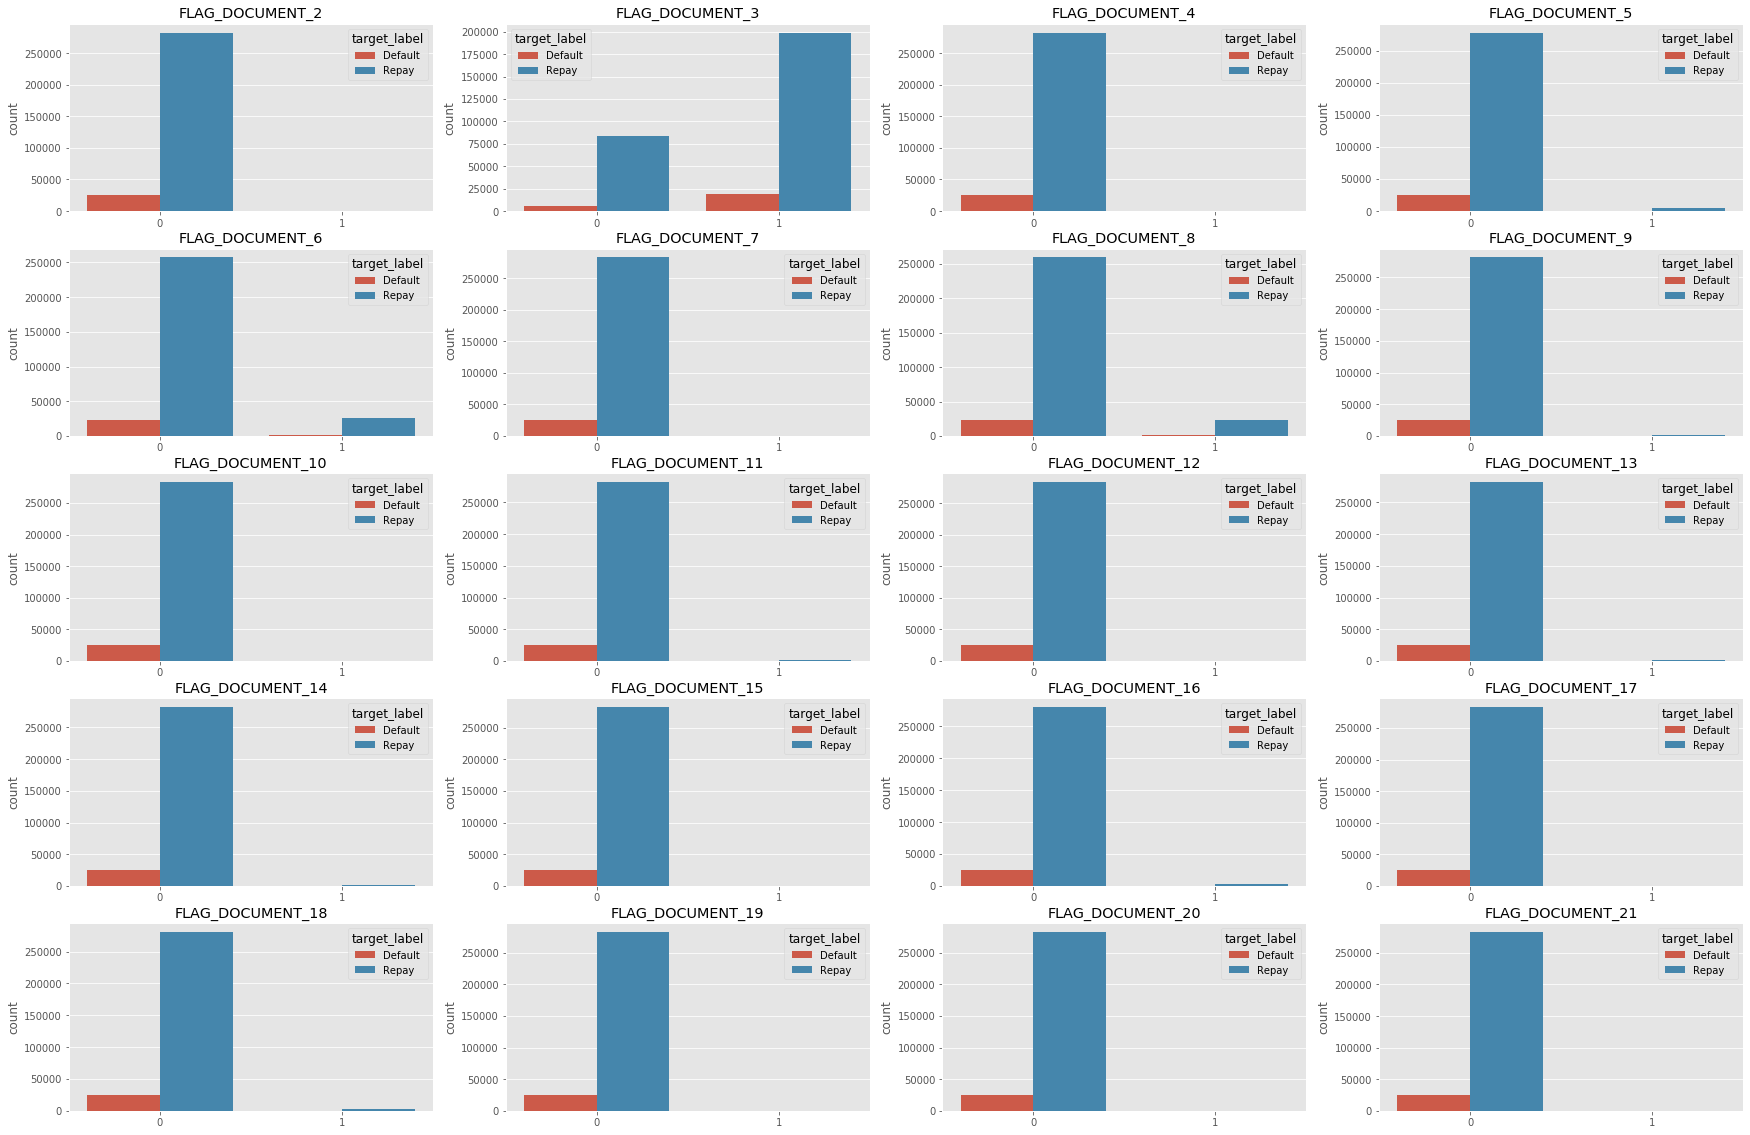

In [53]:
flag_col = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
flagdf = applicationDF[flag_col+["target_label"]]
plt.figure(figsize=(30,20))
for i,j in itertools.zip_longest(flag_col,range(len(flag_col))):
    plt.subplot(5,4,j+1)
    sns.countplot(flagdf[i],hue=flagdf.target_label)
    plt.xlabel("")
    plt.xlabel("")
    plt.title(i)

### EXT_Source

In [54]:
applicationDF.columns[applicationDF.columns.str.contains("EXT", regex=True)]

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3'], dtype='object')

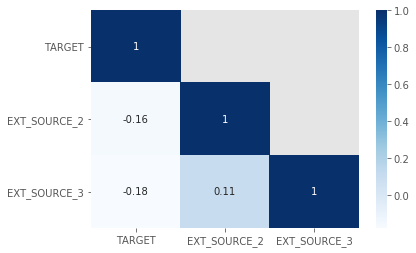

In [55]:
ext=applicationDF[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
extcorr=ext.corr()
mask=np.array(extcorr)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(extcorr,annot=True,cmap='Blues',mask=mask)
plt.show()

In [56]:
factor_col=[ 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 
               'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 
               'LIVE_CITY_NOT_WORK_CITY',  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
               'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
applicationDF[factor_col].shape

(307511, 18)

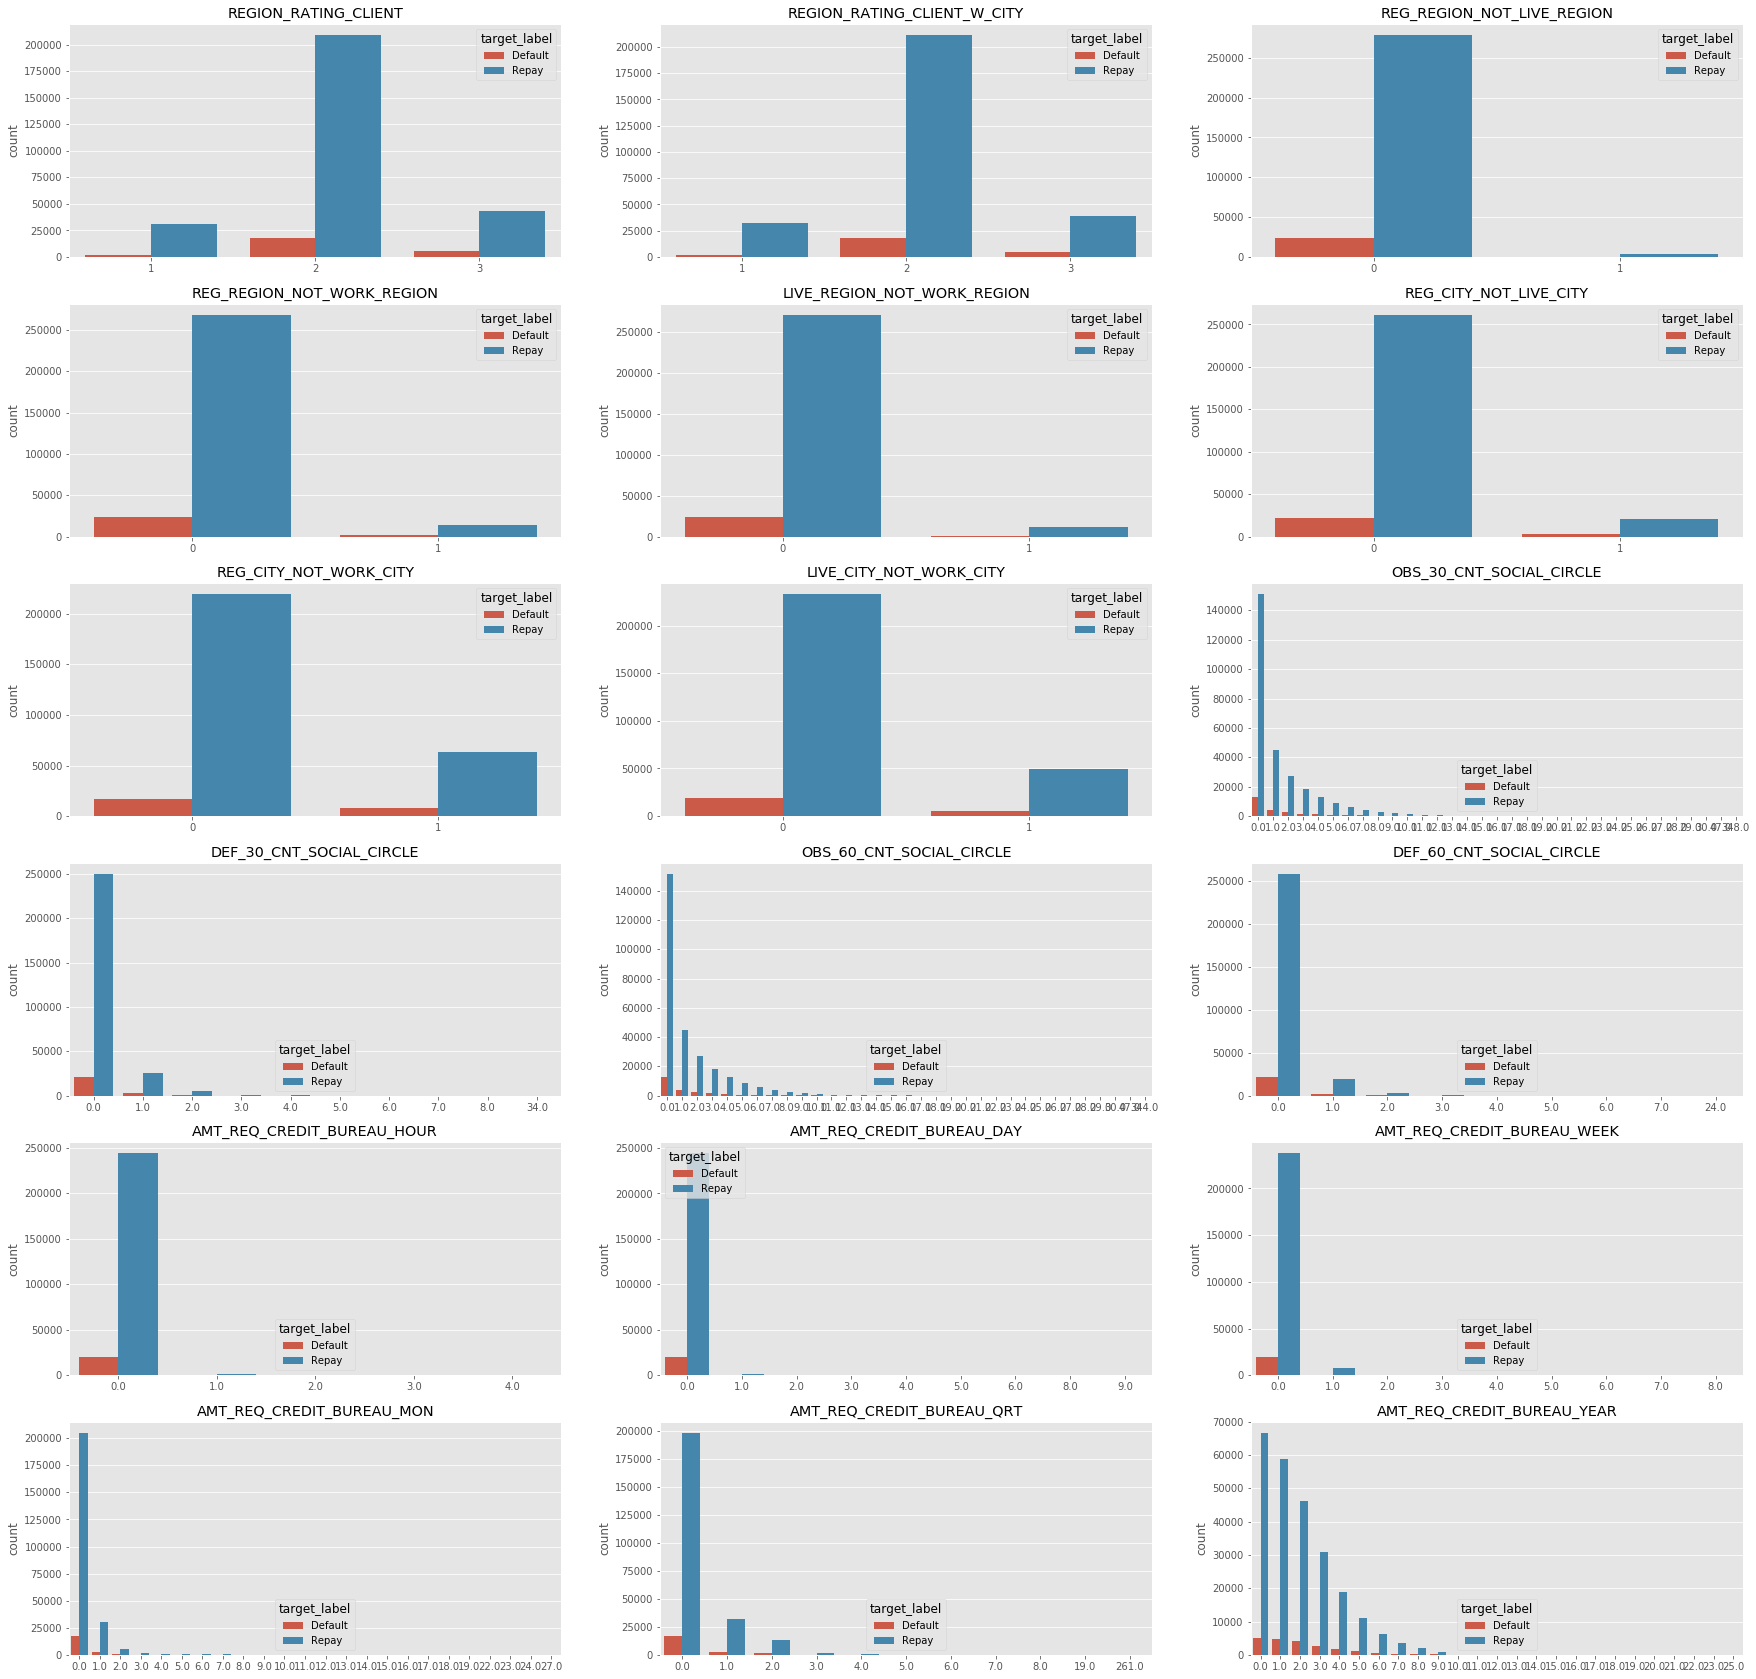

In [57]:
factdf = applicationDF[factor_col+["target_label"]]
plt.figure(figsize=(30,30))
for i,j in itertools.zip_longest(factor_col,range(len(factor_col))):
    plt.subplot(6,3,j+1)
    sns.countplot(factdf[i],hue=factdf.target_label)
    plt.xlabel("")
    plt.xlabel("")
    plt.title(i)

## Previous Data

### Clients Details

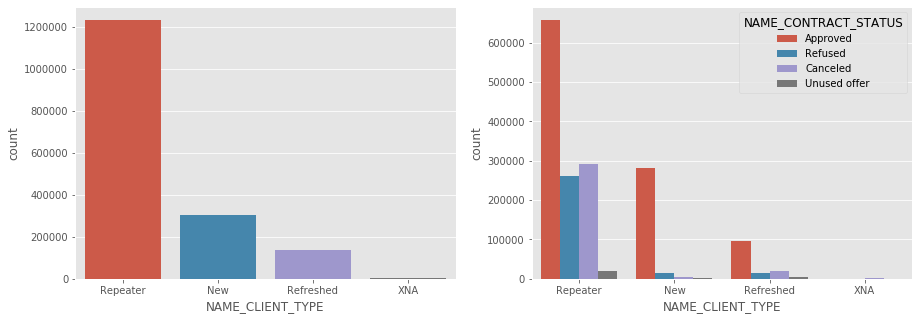

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=previousDF,x='NAME_CLIENT_TYPE')
plt.subplot(122)
sns.countplot(data=previousDF,x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS')
plt.show()

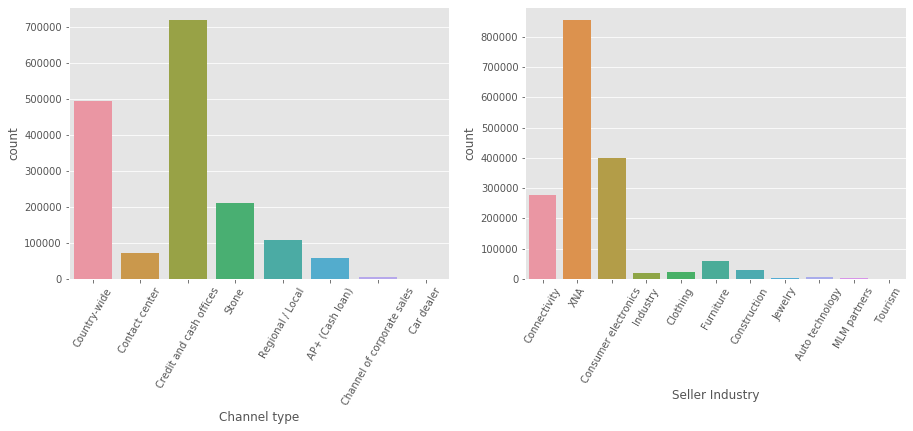

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=previousDF,x='CHANNEL_TYPE')
plt.xticks(rotation=60)
plt.xlabel('Channel type')
plt.subplot(122)
sns.countplot(data=previousDF,x='NAME_SELLER_INDUSTRY')
plt.xticks(rotation=60)
plt.xlabel('Seller Industry')
plt.show()

### Loan & Credit

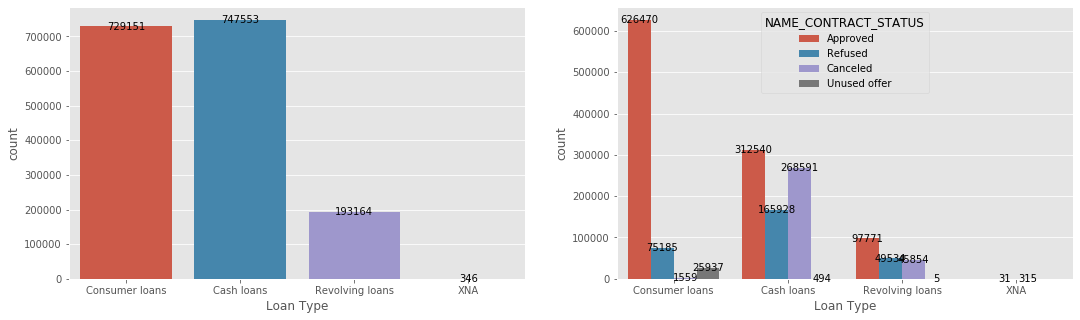

In [60]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5) 
sns.countplot(data=previousDF,x='NAME_CONTRACT_TYPE',ax=ax1)
ax1.set(xlabel='Loan Type')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center')

sns.countplot(data=previousDF,x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',ax=ax2)
ax2.set(xlabel='Loan Type')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center')
plt.show()

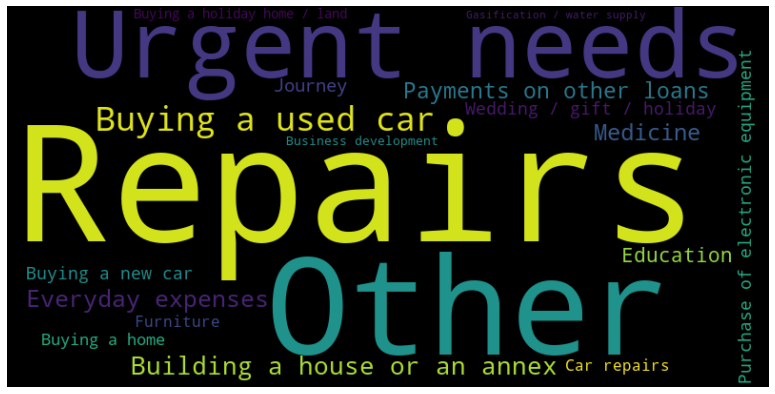

In [61]:
df_cashloan_cloud=previousDF.NAME_CASH_LOAN_PURPOSE.value_counts()
df_cashloan_cloud=df_cashloan_cloud.to_frame().reset_index()
df_cashloan_cloud
d={}
for a, x in df_cashloan_cloud.values:
    d[a]=x
stopwords=['XAP','XNA']
wordcloud=WordCloud(background_color='black',min_font_size=9, width=800,height=400)
wordcloud.generate_from_frequencies({a: x for a, x in df_cashloan_cloud.values if a not in stopwords})
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

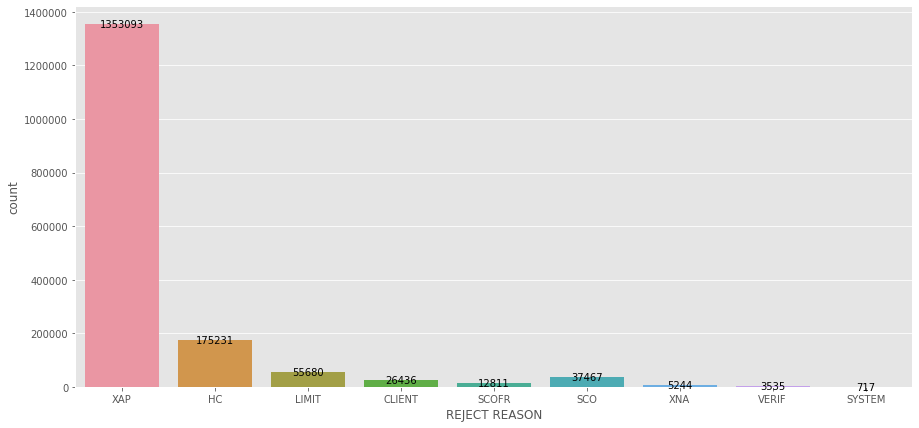

In [62]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=previousDF,x='CODE_REJECT_REASON')
ax.set(xlabel='REJECT REASON')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center')
plt.show()

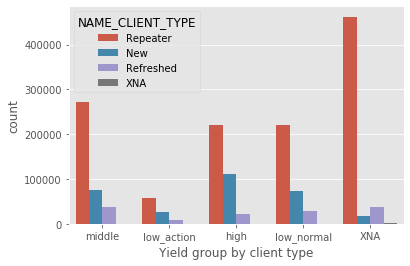

In [63]:
sns.countplot(data=previousDF,x='NAME_YIELD_GROUP',hue='NAME_CLIENT_TYPE')
plt.xlabel('Yield group by client type')
plt.show()

In [64]:
prev_credit=previousDF[[ 'NAME_CONTRACT_STATUS','AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','CNT_PAYMENT']]
prev_corr=prev_credit.corr()
prev_corr

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.808872,0.816429,0.820895,0.394535
AMT_APPLICATION,0.808872,1.000000,0.975824,0.999884,0.680630
AMT_CREDIT,0.816429,0.975824,1.000000,0.993087,0.674278
AMT_GOODS_PRICE,0.820895,0.999884,0.993087,1.000000,0.672129
CNT_PAYMENT,0.394535,0.680630,0.674278,0.672129,1.000000


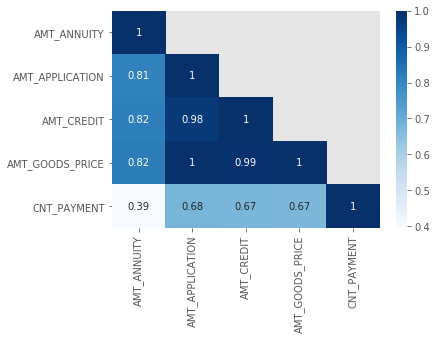

In [65]:
mask=np.array(prev_corr)
mask[np.tril_indices_from(prev_corr)]=False # To show only half of the correlation heatmap
sns.heatmap(data=prev_corr,cmap='Blues',annot=True,mask=mask)
plt.show()

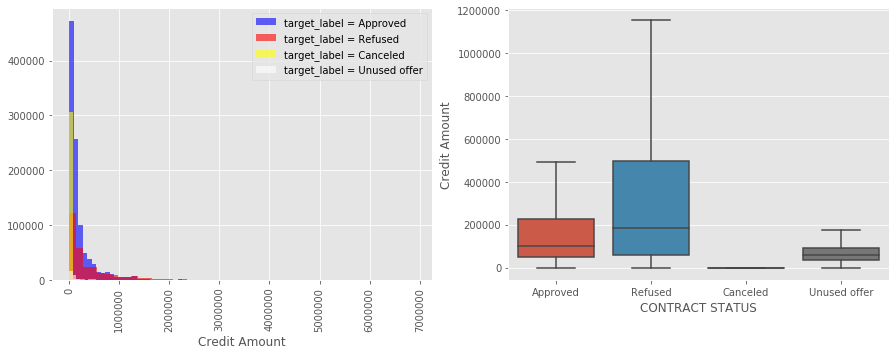

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
prev_credit[prev_credit["NAME_CONTRACT_STATUS"] == "Approved"]["AMT_CREDIT"].hist(bins=50, color='blue', label='target_label = Approved', alpha=0.6)
prev_credit[prev_credit["NAME_CONTRACT_STATUS"] == "Refused"]["AMT_CREDIT"].hist(bins=50, color='red', label='target_label = Refused', alpha=0.6)
prev_credit[prev_credit["NAME_CONTRACT_STATUS"] == "Canceled"]["AMT_CREDIT"].hist(bins=50, color='yellow', label='target_label = Canceled', alpha=0.6)
prev_credit[prev_credit["NAME_CONTRACT_STATUS"] == "Unused offer"]["AMT_CREDIT"].hist(bins=50, color='white', label='target_label = Unused offer', alpha=0.6)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Credit Amount")


plt.subplot(1,2,2)
sns.boxplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT',data=prev_credit,showfliers = False)
plt.xlabel("CONTRACT STATUS")
plt.ylabel("Credit Amount")

plt.show()

## Merged Data

In [67]:
mdf = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
mdf.shape

(1413701, 105)

In [68]:
mdf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target_label,age,age_group,income_label,income_range,years_emp,employment_year,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Default,25,20-30,202.5,200k-300k,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repay,45,40-50,270.0,200k-300k,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repay,45,40-50,270.0,200k-300k,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repay,45,40-50,270.0,200k-300k,3,0-5,2396755,Consumer loans,6737

In [105]:
plt.figure(figsize=(15,7))
con_plot=mdf.groupby(['TARGET','NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y','NAME_CONTRACT_STATUS']).size().reset_index().pivot_table(index='TARGET',columns=['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y','NAME_CONTRACT_STATUS'],values=0)
con_plot=con_plot.T
con_plot

TARGET                                                                 0        1
NAME_CONTRACT_TYPE_x NAME_CONTRACT_TYPE_y NAME_CONTRACT_STATUS                   
Cash loans           Cash loans           Approved              230096.0  19252.0
                                          Canceled              187274.0  18658.0
                                          Refused               115060.0  17006.0
                                          Unused offer             364.0     40.0
                     Consumer loans       Approved              449233.0  37168.0
                                          Canceled                1065.0    156.0
                                          Refused                52780.0   6194.0
                                          Unused offer           18526.0   1707.0
                     Revolving loans      Approved               73464.0   7358.0
                                          Canceled               30252.0   3881.0
                                          Refused                32234.0   5049.0
                                          Unused offer               4.0      NaN
                     XNA                  Canceled                 212.0     54.0
                                          Refused                   22.0      6.0
Revolving loans      Cash loans           Approved               16169.0    864.0
                                          Canceled               13627.0    824.0
                                          Refused                 6949.0    553.0
                                          Unused offer              28.0      NaN
                     Consumer loans       Approved               48395.0   2514.0
                                          Canceled                  93.0     15.0
                                          Refused                 4987.0    321.0
                                          Unused offer            1970.0    132.0
                     Revolving loans      Approved                1499.0     87.0
                                          Canceled                3102.0    210.0
                                          Refused                 3920.0    308.0
                     XNA                  Canceled                  16.0      2.0
                                          Refused                    NaN      1.0

<Figure size 1080x504 with 0 Axes>

TARGET  NAME_CONTRACT_TYPE_x  NAME_CONTRACT_TYPE_y
0       Cash loans            Cash loans              532794
                              Consumer loans          521604
                              Revolving loans         135954
                              XNA                        234
        Revolving loans       Cash loans               36773
                              Consumer loans           55445
                              Revolving loans           8521
                              XNA                         16
1       Cash loans            Cash loans               54956
                              Consumer loans           45225
                              Revolving loans          16288
                              XNA                         60
        Revolving loans       Cash loans                2241
                              Consumer loans            2982
                              Revolving loans            605
                              XNA 